<a href="https://colab.research.google.com/github/farrahnurmalia/9okhub-rxwqbu/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['id', 'created', 'title', 'text_sup_clean', 'text_deep_clean',
       'text_deep_clean_pos', 'hashtags', 'edge'],
      dtype='object')
                                                 title  compound sentiment
0    Coca-Cola's Irrelevant Response to My Letter P...   -0.4215  negative
1    How Messi won the world cup final Qatar 2022 c...    0.5719  positive
2    2022 Qatar World Cup Summary, Journey of Teams...    0.0000  positive
3    Croatia beats Morocco in 2-1 for third place o...    0.0000  positive
4                   [Match thread] Argentina vs France    0.0000  positive
..                                                 ...       ...       ...
668      How can I watch FIFA World Cup in Qatar 2022?    0.0000  positive
669  Morocco vs Croatia 2022 World Cup Third Place ...    0.0000  positive
670  How to watch FIFA World Cup 2022 Online in New..

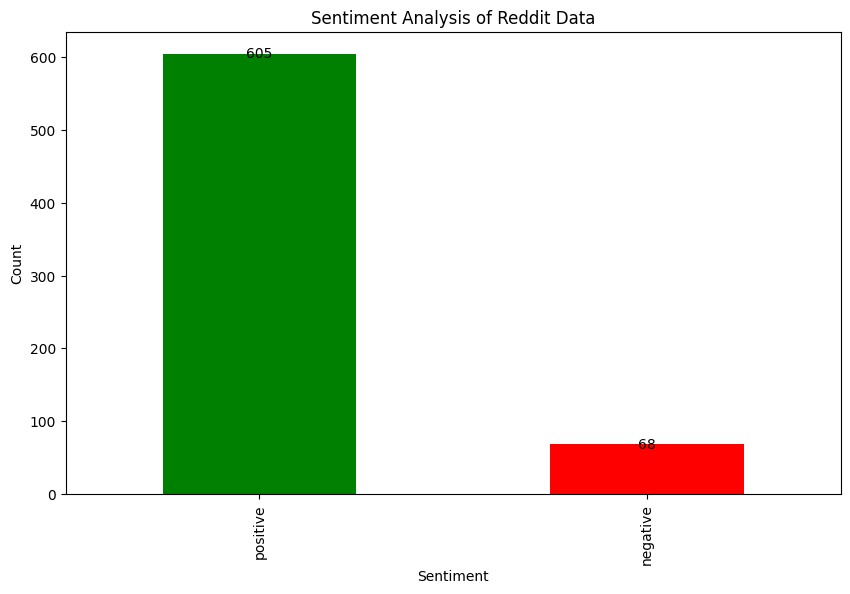

In [6]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')

# Mount Google Drive if you haven't done so already
from google.colab import drive
drive.mount('/content/drive')

# Load CSV data into Pandas DataFrames
reddit_df = pd.read_csv('/content/drive/My Drive/reddit_posts_cleaned.csv')

# Display the column names to identify the correct column for text data
print(reddit_df.columns)

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Assuming the text data is in the 'title' column
reddit_df['compound'] = reddit_df['title'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
reddit_df['sentiment'] = reddit_df['compound'].apply(lambda x: 'positive' if x >= 0 else 'negative')

# Display the DataFrame with sentiment scores and classifications
print(reddit_df[['title', 'compound', 'sentiment']])

# Create a bar plot to visualize sentiment distribution with exact counts
plt.figure(figsize=(10, 6))
ax = reddit_df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Analysis of Reddit Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Annotate the bars with exact counts
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

plt.show()
